In [1]:
import numpy as np # to perform numerical operations
import pandas as pd # to resd the csv files and other
import random
import matplotlib.pyplot as plt #plots images and graphs
from keras.utils import to_categorical # converts labels to one hot encoding

In [2]:
from keras.models import Sequential # creates a sequential neural network
from keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout #used for feature extraction and classification

In [3]:
# loading the dataset from the csv files
train=pd.read_csv('sign_mnist_train.csv')
test=pd.read_csv('sign_mnist_test.csv')
# dataset as numpy array conversion
train_data=np.array(train,dtype='float32')
test_data=np.array(test,dtype='float32')

In [4]:
# define class labels for easy intepretation
class_names=['A','B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

Text(0.5, 1.0, 'Label:E')

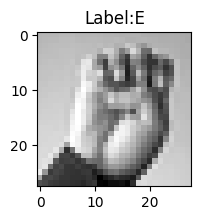

In [6]:
# plot a few images and labels
i=random.randint(1,train_data.shape[0]) # will randomly choose one image from the training dataset
fig1,ax1=plt.subplots(figsize=(2,2)) #create a subplot within the area
plt.imshow(train_data[i,1:].reshape(28,28),cmap='gray') # reshape the image of size 28*28 into gray image
ax1.set_title('Label:{}'.format(class_names[int(train_data[i,0])]))


Text(0.5, 1.0, 'Label')

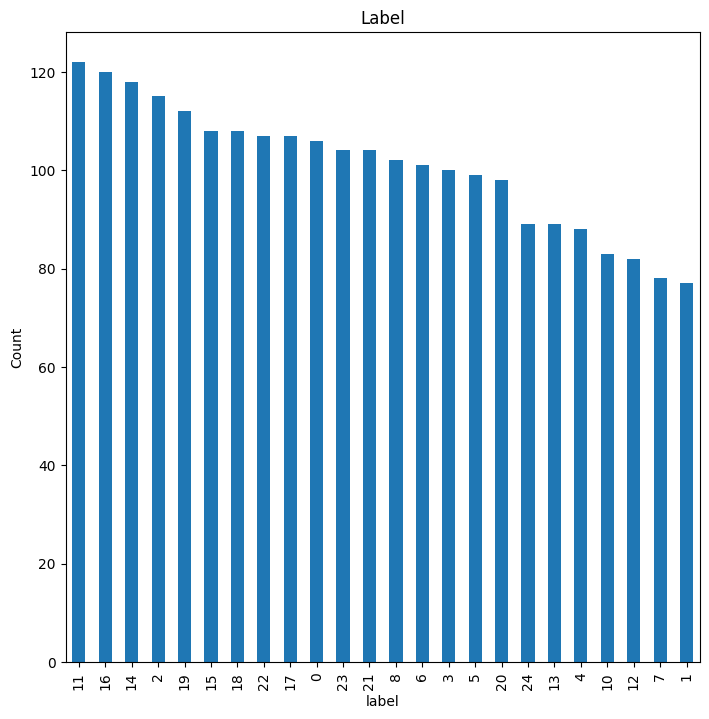

In [7]:
# data distribution visualization
fig=plt.figure(figsize=(18,18)) # create abar chart of 18*18
ax1=fig.add_subplot(221) # will add a subplot within it of  2rows , 2 colums and 1 axis
train['label'].value_counts().plot(kind='bar',ax=ax1)
# it checks wheteher the dataset is balanced or not...if no class is overly represented it means it is balanced
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [8]:
#Normalize / scale X values
# normalize pixel values from (0-255) to 0-1 gray scale for better interpretation
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.


In [13]:
# convert labels into one hot encoding
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)
y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)


In [10]:
# reshape the dataset into (28,28,1) becouse cnn expects only 3D images
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [14]:
#Model-> sequential linear model is used
model=Sequential()
# 32 filters of 2 x 3 size to detect patterns
# relu activation for avoiding negative values
# maxpooling for reduncing dimensions
# dropout prevent over fitting
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# increases filter for deeper extraction of feautures
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# 128 filters to extract complex feautures
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# flattens the extracted features
# dense layer learns relationships
# softmax activation output 25 probablities
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(25,activation='softmax'))
# categorical cross entrophy for best multi class classification
# adam optimizer for adaptive learning optimization
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()
# train the model
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 25)                  │           6,425 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,121 (516.10 KB)

 Trainable params: 132,121 (516.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - acc: 0.0378 - loss: nan - val_acc: 0.0449 - val_loss: nan
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - acc: 0.0391 - loss: nan - val_acc: 0.0449 - val_loss: nan
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - acc: 0.0430 - loss: nan - val_acc: 0.0449 - val_loss: nan
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - acc: 0.0424 - loss: nan - val_acc: 0.0449 - val_loss: nan
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - acc: 0.0384 - loss: nan - val_acc: 0.0449 - val_loss: nan
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - acc: 0.0417 - loss: nan - val_acc: 0.0449 - val_loss: nan
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - acc: 0.0470 - loss: nan - val_acc: 0.0449 - val_loss: nan
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - acc: 0.0523 - loss: nan - val_acc: 0.0449 - val_loss: nan
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - acc: 0.0441 - loss: nan - val_acc: 0.0449 - val_lo

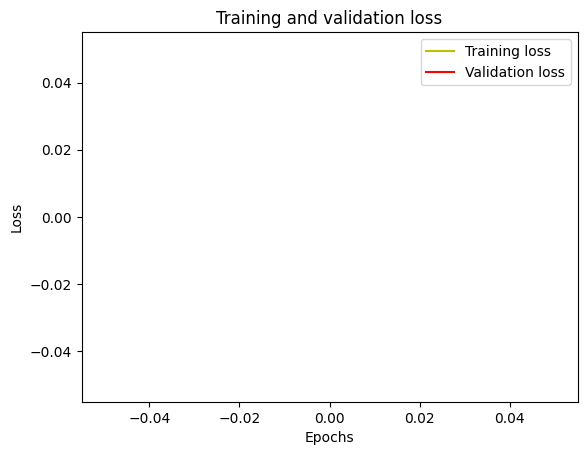

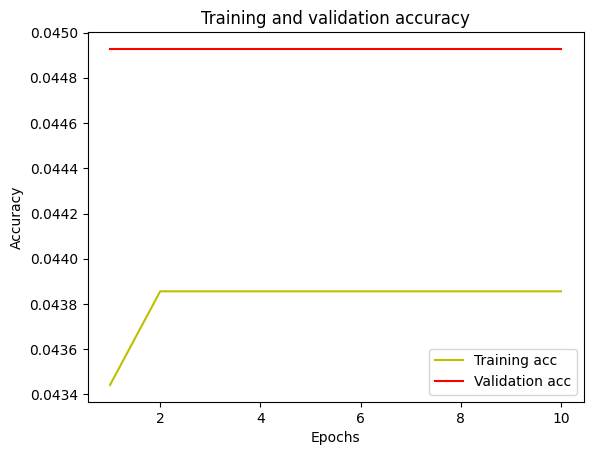

In [18]:
# plot the training and validation
# hows how training loss decreases over epochs.
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Shows how training accuracy improves.
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Accuracy Score =  0.9385108756274401
Predicted Label:  F
True Label:  F


Text(0, 0.5, 'Fraction of incorrect predictions')

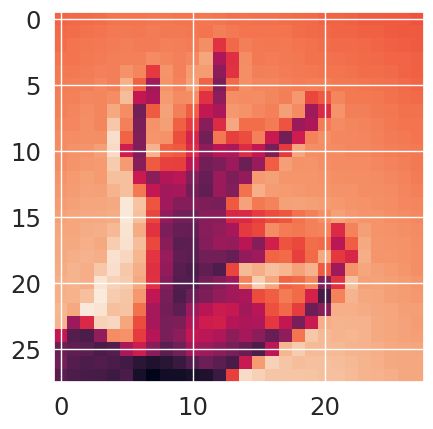

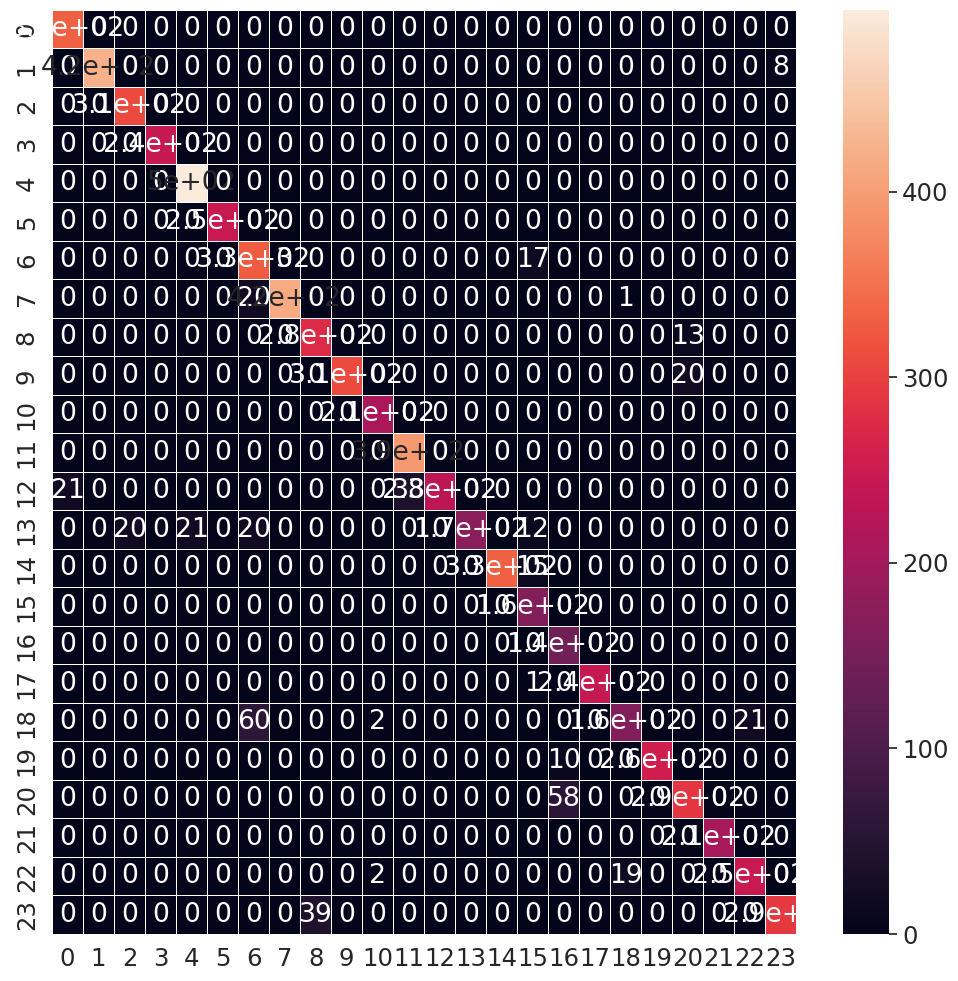

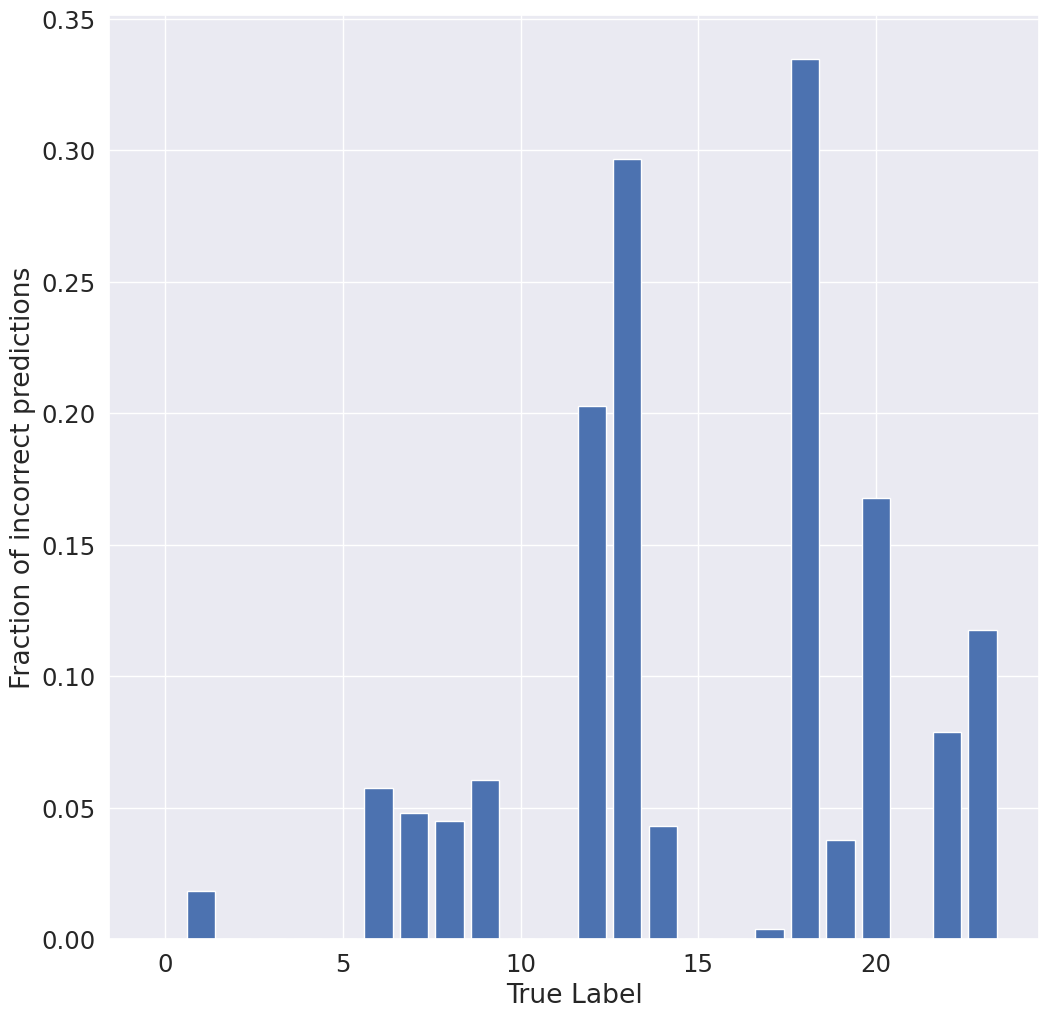

In [35]:
# Predicts labels for the test set.
prediction =np.argmax( model.predict(X_test),axis=-1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score = ', accuracy)
# picks a random test image, shows the predicted vs actual label.
i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0])
print("Predicted Label: ", class_names[int(prediction[i])])
print("True Label: ", class_names[int(y_test[i])])
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
# plt.xticks(np.arange(24), class_names)
